# Introducción a la Ciencia de Datos: Tarea 1

Este notebook contiene el código de base para realizar la Tarea 1 del curso. Puede copiarlo en su propio repositorio y trabajar sobre el mismo.
Las **instrucciones para ejecutar el notebook** están en la [página inicial del repositorio](https://github.com/DonBraulio/introCD).

Se utiliza el lenguaje Python y la librería Pandas. Si no tiene ninguna familiaridad con la librería, se recomienda realizar algún tutorial introductorio (ver debajo).
También se espera que los alumnos sean proactivos a la hora de consultar las documentaciones de las librerías y del lenguaje, para entender el código provisto.
Además de los recursos provistos en la [página del curso](https://eva.fing.edu.uy/course/view.php?id=1378&section=1), los siguientes recursos le pueden resultar interesantes:
 - [Pandas getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) y [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html): Son parte de la documentación en la página oficial de Pandas.
 - [Kaggle Learn](https://www.kaggle.com/learn): Incluye tutoriales de Python y Pandas.


Si desea utilizar el lenguaje R y está dispuesto a no utilizar (o traducir) este código de base, también puede hacerlo.

En cualquier caso, **se espera que no sea necesario revisar el código para corregir la tarea**, ya que todos los resultados y análisis relevantes deberían estar en el **informe en formato PDF**.

## Cargar bibliotecas (dependencias)
Recuerde instalar los requerimientos (`requirements.txt`) en el mismo entorno donde está ejecutando este notebook (ver [README](https://github.com/DonBraulio/introCD)).


In [1]:
from time import time
from pathlib import Path
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

## Lectura de Datos

In [2]:
# DataFrame con todas las obras:
df_works = pd.read_csv('C:/IntroCD/Entrega_1/data/shakespeare/works.csv')

# Todos los párrafos de todas las obras
df_paragraphs = pd.read_csv('C:/IntroCD/Entrega_1/data/shakespeare/paragraphs.csv')

df_chapters = pd.read_csv('C:/IntroCD/Entrega_1/data/shakespeare/chapters.csv')

df_characters = pd.read_csv('C:/IntroCD/Entrega_1/data/shakespeare/characters.csv')

In [3]:

df_works.drop(columns=['Unnamed: 0'], inplace=True)

df_paragraphs .drop(columns=['Unnamed: 0'], inplace=True)

# TODO: cargar el resto de las tablas

df_chapters.drop(columns=['Unnamed: 0'], inplace=True)
df_characters.drop(columns=['Unnamed: 0'], inplace=True)


## Exploración de Datos

In [4]:
# Obras
df_works

,id,Title,LongTitle,Date,GenreType
0,1,Twelfth Night,"Twelfth Night, Or What You Will",1599,Comedy
1,2,All's Well That Ends Well,All's Well That Ends Well,1602,Comedy
2,3,Antony and Cleopatra,Antony and Cleopatra,1606,Tragedy
3,4,As You Like It,As You Like It,1599,Comedy
4,5,Comedy of Errors,The Comedy of Errors,1589,Comedy
5,6,Coriolanus,Coriolanus,1607,Tragedy
6,7,Cymbeline,"Cymbeline, King of Britain",1609,History
7,8,Hamlet,"Tragedy of Hamlet, Prince of Denmark, The",1600,Tragedy
8,9,"Henry IV, Part I","History of Henry IV, Part I",1597,History
9,10,"Henry IV, Part II","History of Henry IV, Part II",1597,History


In [5]:
df_paragraphs["PlainText"]

0        [Enter DUKE ORSINO, CURIO, and other Lords; Mu...
1        If music be the food of love, play on;\r\nGive...
2                               Will you go hunt, my lord?
3                                             What, Curio?
4                                                The hart.
                               ...                        
35460    That she is living,\r\nWere it but told you, s...
35461    You gods, look down\r\nAnd from your sacred vi...
35462    There's time enough for that;\r\nLest they des...
35463    O, peace, Paulina!\r\nThou shouldst a husband ...
35464                                             [Exeunt]
Name: PlainText, Length: 35465, dtype: object

## Parte 1: sección A:

In [6]:
# Primeras filas de 'ddf_works'
df_works.head()

,id,Title,LongTitle,Date,GenreType
0,1,Twelfth Night,"Twelfth Night, Or What You Will",1599,Comedy
1,2,All's Well That Ends Well,All's Well That Ends Well,1602,Comedy
2,3,Antony and Cleopatra,Antony and Cleopatra,1606,Tragedy
3,4,As You Like It,As You Like It,1599,Comedy
4,5,Comedy of Errors,The Comedy of Errors,1589,Comedy


In [7]:
# Primeras filas de 'df_paragraphs'
df_paragraphs.head()

,id,ParagraphNum,PlainText,character_id,chapter_id
0,630863,3,"[Enter DUKE ORSINO, CURIO, and other Lords; Mu...",1261,18704
1,630864,4,"If music be the food of love, play on;\r\nGive...",840,18704
2,630865,19,"Will you go hunt, my lord?",297,18704
3,630866,20,"What, Curio?",840,18704
4,630867,21,The hart.,297,18704


In [8]:
# Primeras filas de 'df_chapters'
df_chapters.head()

,id,Act,Scene,Description,work_id
0,18704,1,1,DUKE ORSINO’s palace.,1
1,18705,1,2,The sea-coast.,1
2,18706,1,3,OLIVIA’S house.,1
3,18707,1,4,DUKE ORSINO’s palace.,1
4,18708,1,5,OLIVIA’S house.,1


In [9]:
# Primeras filas de 'df_characters'
df_characters.head()

,id,CharName,Abbrev,Description
0,1,First Apparition,First Apparition,NaN
1,2,First Citizen,First Citizen,NaN
2,3,First Conspirator,First Conspirator,NaN
3,4,First Gentleman,First Gentleman,NaN
4,5,First Goth,First Goth,NaN


In [10]:
print("Nombres de columnas de df_works:")
print(df_works.columns)
print("------------------------------")

print("Nombres de columnas de df_paragraphs:")
print(df_paragraphs.columns)

print("------------------------------")
print("Nombres de columnas de df_chapters:")
print(df_chapters.columns)

print("------------------------------")
print("Nombres de columnas de df_characters:")
print(df_characters.columns)


Nombres de columnas de df_works:
Index(['id', 'Title', 'LongTitle', 'Date', 'GenreType'], dtype='object')
------------------------------
Nombres de columnas de df_paragraphs:
Index(['id', 'ParagraphNum', 'PlainText', 'character_id', 'chapter_id'], dtype='object')
------------------------------
Nombres de columnas de df_chapters:
Index(['id', 'Act', 'Scene', 'Description', 'work_id'], dtype='object')
------------------------------
Nombres de columnas de df_characters:
Index(['id', 'CharName', 'Abbrev', 'Description'], dtype='object')



1.   Tabla "works": contiene información sobre las obras de Shakespeare, sus títulos, fechas de publicación y sus géneros.

2.   Tabla "paragraphs": Esta tabla contiene párrafos o fragmentos de texto de las obras de Shakespeare. Cada registro podría representar un párrafo específico de una obra.

3. Tabla "chapters" (capítulos): Si existe una tabla "chapters" en la base de datos, podría contener información estructurada sobre las obras, como divisiones en actos, escenas o capítulos. La función de esta tabla sería organizar las obras en secciones más grandes, facilita la navegación y el análisis.

4. Tabla "characters" (personajes): información sobre los personajes que aparecen en las obras. Cada registro podría representar un personaje con detalles como nombre, descripción, roles en obras específicas. La función de esta tabla es proporcionar información detallada sobre los personajes en las obras.



In [11]:
# Verificar datos faltantes en cada data frame

missing_works = df_works.isnull().sum()
print("Datos faltantes en df_works:")
print(missing_works)

missing_paragraphs = df_paragraphs.isnull().sum()
print("\nDatos faltantes en df_paragraphs:")
print(missing_paragraphs)

missing_chapters = df_chapters.isnull().sum()
print("\nDatos faltantes en df_chapters:")
print(missing_chapters)

missing_characters = df_characters.isnull().sum()
print("\nDatos faltantes en df_characters:")
print(missing_characters)


Datos faltantes en df_works:
id           0
Title        0
LongTitle    0
Date         0
GenreType    0
dtype: int64

Datos faltantes en df_paragraphs:
id              0
ParagraphNum    0
PlainText       0
character_id    0
chapter_id      0
dtype: int64

Datos faltantes en df_chapters:
id             0
Act            0
Scene          0
Description    0
work_id        0
dtype: int64

Datos faltantes en df_characters:
id               0
CharName         0
Abbrev           5
Description    646
dtype: int64


### Datos faltantes:

En la tabla *df_works* no hay datos faltantes en ninguna de las columnas. Todos los valores están presentes. Lo mismo sucede con las tablas *df_paragraphs* y *df_chapters*.

Por otro lado, la tabla *df_characters* presenta 5 datos faltantes en la columna "Abbrev", y la columna "Description" tiene 646 datos faltantes.

La mayoría de tus DataFrames tienen todos los datos completos, lo cual es bueno para el análisis. Depende de los objetivos se podría eliminar o sustituir los datos faltantes, así no se entorpece futuros análisis.

In [12]:
# Unimos la talba de parrafos y de personajes, por medio de 'character_id'

merged_df = pd.merge(df_paragraphs, df_characters, left_on='character_id', right_on='id', how='inner')

paragraphs_per_character = merged_df['CharName'].value_counts().reset_index()
paragraphs_per_character.columns = ['CharName', 'ParagraphCount']

sorted_paragraphs_per_character = paragraphs_per_character.sort_values(by='ParagraphCount', ascending=False)

top_10_characters = sorted_paragraphs_per_character.head(10)

print("Los 10 personajes con más párrafos:")
print(top_10_characters)


Los 10 personajes con más párrafos:
             CharName  ParagraphCount
0  (stage directions)            3751
1                Poet             766
2            Falstaff             471
3             Henry V             377
4              Hamlet             358
5  Duke of Gloucester             285
6             Othello             274
7                Iago             272
8              Antony             253
9         Richard III             246


In [13]:
# Eliminamos a las dos primeras filas y encontramos el personaje con mayor parrafos

filtered_df = merged_df[(merged_df['CharName'] != '(stage directions)') & (merged_df['CharName'] != 'Poet')]

paragraphs_per_character_filtered = filtered_df.groupby('CharName')['id_x'].count().reset_index()
paragraphs_per_character_filtered.columns = ['CharName', 'ParagraphCount']

most_paragraphs_character_filtered = paragraphs_per_character_filtered[paragraphs_per_character_filtered['ParagraphCount'] == paragraphs_per_character_filtered['ParagraphCount'].max()]

print("Personaje con más párrafos (sin incluir '(stage directions)' y 'Poet'):")
print(most_paragraphs_character_filtered)


Personaje con más párrafos (sin incluir '(stage directions)' y 'Poet'):
     CharName  ParagraphCount
260  Falstaff             471


### Análisis de los párrafos

Eliminamos las dos primeras filas por no ser personajes propiamente dichos. **Sin normalizar los párrafos y sin hacer cambios, el personja con mayor presencua en los párrafos es $'Falstaff'$, con un total de 471. Veremos en el póximo apartados si cambia al normalizar las palabras.**

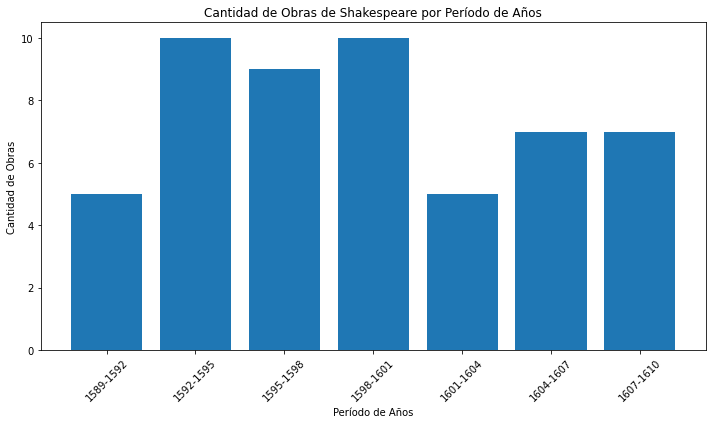

In [14]:
works_per_year = df_works.groupby('Date')['id'].count()

# Definimos los períodos de análisis, por ejemplo cada 3 años:
periods = list(range(min(works_per_year.index), max(works_per_year.index) + 1, 3))


works_per_period = []
for i in range(len(periods) - 1):
    start_year = periods[i]
    end_year = periods[i + 1]
    works_count = works_per_year.loc[start_year:end_year].sum()
    works_per_period.append(works_count)


plt.figure(figsize=(10, 6))
plt.bar(range(len(works_per_period)), works_per_period, tick_label=[f'{start}-{end}' for start, end in zip(periods[:-1], periods[1:])])
plt.xlabel('Período de Años')
plt.ylabel('Cantidad de Obras')
plt.title('Cantidad de Obras de Shakespeare por Período de Años')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 864x576 with 0 Axes>

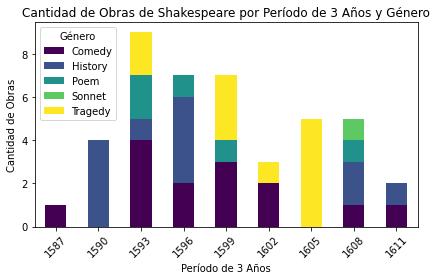

In [15]:
# Agrupar las obras por período de 3 años y género, y contar la cantidad de obras en cada grupo
df_works['Year_Period'] = df_works['Date'] // 3 * 3  # Redondear cada año al período de 3 años más cercano
works_per_genre_period = df_works.groupby(['Year_Period', 'GenreType'])['id'].count().unstack()

# Graficar el gráfico de barras apiladas por período de 3 años
plt.figure(figsize=(12, 8))
works_per_genre_period.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Período de 3 Años')
plt.ylabel('Cantidad de Obras')
plt.title('Cantidad de Obras de Shakespeare por Período de 3 Años y Género')
plt.legend(title='Género')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Limpieza de Texto y Conteo de Palabras

In [16]:
contractions_dict = {
    "can't": "cannot",
    "won't": "will not",
    "n't": " not",
    "'re": " are",
    "'s": " is",
    "'d": " would",
    "'ll": " will",
    "'t": " not",
    "'ve": " have",
    "'m": " am",
}

def replace_and_count_contractions(text, contractions_dict, total_counts):
    for contraction, full_form in contractions_dict.items():
        count = len(re.findall(re.escape(contraction), text))
        total_counts[contraction] += count
        text = re.sub(re.escape(contraction), full_form, text)
    return text

def clean_text(df, column_name, contractions_dict):
    # Convertir todo a minúsculas
    result = df[column_name].str.lower()

    total_counts = {key: 0 for key in contractions_dict.keys()}

    # Aplicar la función de reemplazo de contracciones y contar (para sacar el primer grafico comentar con # con la siguiente linea )
    result = result.apply(lambda text: replace_and_count_contractions(text, contractions_dict, total_counts))

    # Quitar signos de puntuación y cambiarlos por espacios (" ")
    for punc in ["[", "\n", ",", "?", ";", "!", "(", ")", ".", "]", "$", ":", "´"]:
        result = result.str.replace(punc, " ")

    return result, total_counts

# Creamos una nueva columna CleanText a partir de PlainText y obtenemos los conteos de contracciones
df_paragraphs["CleanText"], total_counts = clean_text(df_paragraphs, "PlainText", contractions_dict)


print(df_paragraphs[["PlainText", "CleanText"]])


                                               PlainText  \
0      [Enter DUKE ORSINO, CURIO, and other Lords; Mu...   
1      If music be the food of love, play on;\r\nGive...   
2                             Will you go hunt, my lord?   
3                                           What, Curio?   
4                                              The hart.   
...                                                  ...   
35460  That she is living,\r\nWere it but told you, s...   
35461  You gods, look down\r\nAnd from your sacred vi...   
35462  There's time enough for that;\r\nLest they des...   
35463  O, peace, Paulina!\r\nThou shouldst a husband ...   
35464                                           [Exeunt]   

                                               CleanText  
0       enter duke orsino  curio  and other lords  mu...  
1      if music be the food of love  play on \r give ...  
2                             will you go hunt  my lord   
3                                          

  Contracción Sustitución  Cantidad
0       can't      cannot         3
1       won't    will not         0
2         n't         not       276
3         're         are       144
4          's          is      8812
5          'd       would      6482
6         'll        will      2493
7          't         not      3036
8         've        have        18
9          'm          am       110


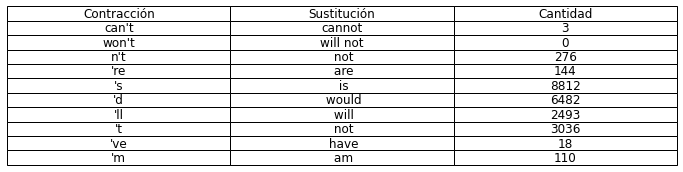

In [17]:

contractions_df = pd.DataFrame(list(contractions_dict.items()), columns=['Contracción', 'Sustitución'])
contractions_df['Cantidad'] = contractions_df['Contracción'].map(total_counts)

# Mostrar la tabla
print(contractions_df)

contractions_df.to_csv('contractions_table.csv', index=False)

fig, ax = plt.subplots(figsize=(10, 2))  

ax.axis('tight')
ax.axis('off')


table = ax.table(cellText=contractions_df.values, colLabels=contractions_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2) 

plt.savefig('contractions_table.png', bbox_inches='tight', dpi=300)


plt.show()


In [18]:
# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_paragraphs["WordList"] = df_paragraphs["CleanText"].str.split()

# Veamos la nueva columna creada
# Notar que a la derecha tenemos una lista: [palabra1, palabra2, palabra3]
df_paragraphs[["CleanText", "WordList"]]

,CleanText,WordList
0,enter duke orsino curio and other lords mu...,"[enter, duke, orsino, curio, and, other, lords..."
1,if music be the food of love play on \r give ...,"[if, music, be, the, food, of, love, play, on,..."
2,will you go hunt my lord,"[will, you, go, hunt, my, lord]"
3,what curio,"[what, curio]"
4,the hart,"[the, hart]"
...,...,...
35460,that she is living \r were it but told you sh...,"[that, she, is, living, were, it, but, told, y..."
35461,you gods look down\r and from your sacred via...,"[you, gods, look, down, and, from, your, sacre..."
35462,there is time enough for that \r lest they des...,"[there, is, time, enough, for, that, lest, the..."
35463,o peace paulina \r thou shouldst a husband t...,"[o, peace, paulina, thou, shouldst, a, husband..."


In [19]:
df_words = df_paragraphs.explode("WordList")

df_words.drop(columns=["CleanText", "PlainText"], inplace=True)

df_words.rename(columns={"WordList": "word"}, inplace=True)

# Verificar que el número de filas es mucho mayor
df_words

,id,ParagraphNum,character_id,chapter_id,word
0,630863,3,1261,18704,enter
0,630863,3,1261,18704,duke
0,630863,3,1261,18704,orsino
0,630863,3,1261,18704,curio
0,630863,3,1261,18704,and
...,...,...,...,...,...
35463,666326,3483,667,19648,would
35463,666326,3483,667,19648,hastily
35463,666326,3483,667,19648,lead
35463,666326,3483,667,19648,away


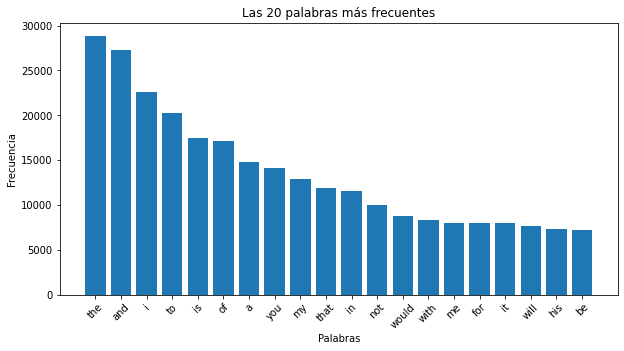

In [20]:
words = df_words['word'].dropna()  # Eliminar valores NaN si los hay

word_counter = Counter()
for word_list in words:
    word_counter.update(word_list.split())  


most_common_words = word_counter.most_common(20)


words, counts = zip(*most_common_words)

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Las 20 palabras más frecuentes')
plt.xticks(rotation=45)
plt.show()

 ## Personajes con mayor cantidad de palabras

In [21]:
# Agregamos el nombre de los personajes
# TODO: des-comentar luego de cargar df_characters

df_words = pd.merge(df_words, df_characters[["id", "CharName"]], left_on="character_id", right_on="id")

In [22]:
# TODO:
# - des-comentar luego de hacer el merge
# - Encuentra algún problema en los resultados?

words_per_character = df_words.groupby("CharName")["word"].count().sort_values(ascending=False)
words_per_character

CharName
Poet                  50549
(stage directions)    16227
Henry V               15309
Falstaff              14742
Hamlet                12247
                      ...  
Philip                    3
Taurus                    2
Nicholas                  2
Joseph                    2
Thieves                   1
Name: word, Length: 925, dtype: int64

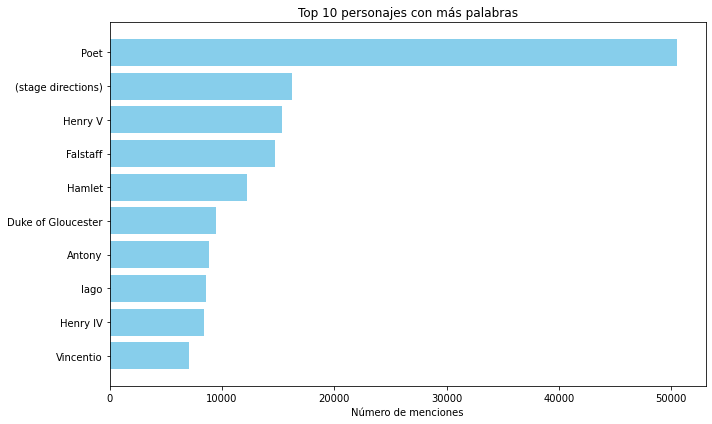

In [23]:
# Convierte la serie en un DataFrame para facilitar el formateo
df_words_per_character = words_per_character.reset_index()
df_words_per_character.columns = ['Personaje', 'Número de menciones']

# Obtener los 10 personajes con más palabras
top_10_characters = df_words_per_character.head(10)


# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_10_characters['Personaje'], top_10_characters['Número de menciones'], color='skyblue')
plt.xlabel('Número de menciones')
plt.title('Top 10 personajes con más palabras')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el personaje con más palabras esté en la parte superior
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Respuesta:

Sí, hay un problema potencial en los resultados que se muestran en *words_per_character*.  El problema está relacionado con la inclusión de los nombres "Poet" y "(stage directions)", se incluyeron comp personajes en la agrupación de palabras. Estos nombres, especialmente "(stage directions)", no son personajes que pertenezcan a alguna obra de teatro de Shakespeare.

Por lo tanto, el problema principal es que "Poet" y "(stage directions)" están distorsionando los resultados, no reflejan la cantidad real de palabras asociadas a los personajes. Para resolver este problema, se deben eliminar o filtrar los nombres "Poet" y "(stage directions)" del análisis de palabras por personaje.

Siguiendo la sugerencia anterior, el personaje con más parrafos es *'Henry V'*, con un total de 15076.

In [24]:
# Eliminar las filas correspondientes a 'Poet' y '(stage directions)'
words_per_character = words_per_character.drop(['Poet', '(stage directions)'])

print(words_per_character)

CharName
Henry V               15309
Falstaff              14742
Hamlet                12247
Duke of Gloucester     9478
Antony                 8821
                      ...  
Philip                    3
Taurus                    2
Nicholas                  2
Joseph                    2
Thieves                   1
Name: word, Length: 923, dtype: int64


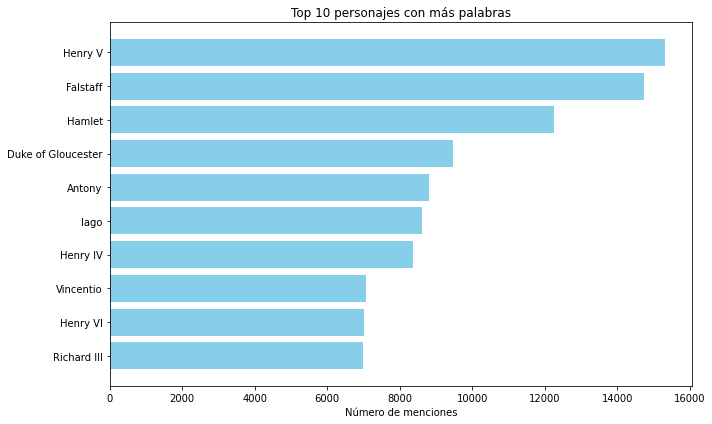

In [26]:
# Convierte la serie en un DataFrame para facilitar el formateo
df_words_per_character = words_per_character.reset_index()
df_words_per_character.columns = ['Personaje', 'Número de menciones']

# Obtener los 10 personajes con más palabras
top_10_characters = df_words_per_character.head(10)


# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_10_characters['Personaje'], top_10_characters['Número de menciones'], color='skyblue')
plt.xlabel('Número de menciones')
plt.title('Top 10 personajes con más palabras')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el personaje con más palabras esté en la parte superior
plt.tight_layout()


# Mostrar el gráfico
plt.show()